## Notebook Objective and Dataset

The challenge objective: tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!

This notebook specifically explore groups who earns highest in the community (let me call them ELITE GROUP(EG)). Primary reason to explore them say ELITE GROUP(EG) is to understand their abilities and the opportunities in the future. Analysis on this category will help to identify the the gap between these high price band individuals and others. The analysis focuses on these 'elite individuals' and factors associated with them.

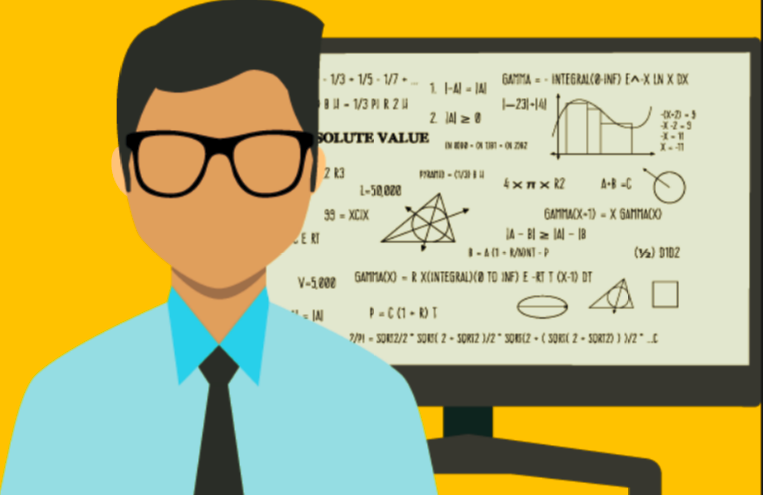


The survey was live for 3.5 weeks in October, and after cleaning the data we finished with 20,036 responses! 
https://www.kaggle.com/c/kaggle-survey-2020

# Acknowledgements

Ideas and motivations from below wonderful notebooks: <br>
https://www.kaggle.com/vikasbevoor/a-story-on-currently-not-employed

# Table of Contents:<br>

* [Highly paid employee patterns](#1.-Identify-highly-paid-individual-counts) <br>
 * [Top 4 pay scale bands](#1.1-Top-4-bands)<br>
* [Analyse EG Qualifications](#2.-Analyse-EG-Qualifications)<br>
 * [Age, Gender of EG](#2.1-Age,-Gender-of-EG)<br>
 * [Education and ML Experience](2.2-Education-and-ML-Experience) <br>
 * [Coding experience and ML experience](#2.3-Coding-experience-and-ML-experience)<br>
* [How EG enrich their knowledge](#3.-How-EG-enrich-their-knowledge)<br>
 * [Blog media sources, Coursera Plaform](#3.1-Blog-media-sources,-Coursera-Plaform)<br>
 * [ML experience vs Neural Networks](#3.2-ML-experience-vs-Neural-Networks)<br>
* [Conclusion](#Conclusion)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", sep=',',low_memory=False)
df = df.drop(index=0, axis=0)
df.rename(columns={'Q1':'Age','Q2':'Gender', 'Q3':'Country', 'Q4':'Education', 'Q5':'Current_role',
       'Q6':'Coding_experience', 'Q7_Part_1':'Python_on_regular_basis', 'Q7_Part_2':'R_on_regular_basis', 'Q7_Part_3':'SQL_on_regular_basis','Q7_Part_4':'C_on_regular_basis', 'Q7_Part_5':'C++_on_regular_basis', 'Q7_Part_6':'Java_on_regular_basis',
       'Q7_Part_7':'Javascript_on_regular_basis', 'Q7_Part_8':'Julia_on_regular_basis','Q8':'Programming_lang_recomndtn', 'Q9_Part_1':'Jupyterlab_IDE_on_regular_basis', 'Q9_Part_2':'RStudio_IDE_on_regular_basis',  'Q9_Part_5':'Pycharm_IDE_on_regular_basis',
       'Q9_Part_6':'Spyder_IDE_on_regular_basis', 'Q10_Part_1':'Kaggle_notebook_on_regular_basis', 'Q10_Part_2':'Colab_notebook_on_regular_basis', 'Q11':'Computing_platform', 'Q12_Part_1': 'GPU_specialized_hardware', 'Q12_Part_2':'TPU_specialized_hardware',
       'Q13':'TPU_usage', 'Q14_Part_1':'Matplotlib_visualization_library', 'Q14_Part_2':'Seaborn_visualization_library',
       'Q14_Part_3':'PLotly_visualization_library', 'Q15':'ML_experience','Q16_Part_1':'scikit_learn_framework', 'Q16_Part_2':'Tensorflow_framework', 'Q16_Part_3':'Keras_framework', 'Q16_Part_4':'Pytorch_framework',
       'Q17_Part_1':'lin_log_reg_ML_algorithm', 'Q17_Part_2':'DT_RF_ML_algorithm',
       'Q17_Part_3':'GBoost_ML_algorithm', 'Q17_Part_6':'Neural_network_ML_algorithm', 'Q17_Part_7':'CNN_ML_algorithm',
       'Q17_Part_9':'RNN_ML_algorithm','Q19_Part_1':'Word_embeddings_NLP', 'Q19_Part_2':'Encoder_decoder_NLP','Q20':'Company_size', 'Q21': 'Individuals_num', 'Q22':'ML_implementation_curr_emplyr', 
       'Q24':'Yearly_compensation', 'Q25':'Money_spent_ML', 'Q26_A_Part_1':'AWS_cloud_computing', 'Q26_A_Part_2':'Azure_cloud_computing',
       'Q29_A_Part_1':'MySQL_bigdata', 'Q29_A_Part_2':'PostgreSQL_bigdata','Q30':'Bigdata_products', 'Q31_A_Part_2':'PowerBI_buis_intel','Q31_A_Part_5':'Tableau_buis_intel', 
       'Q32':'Buis_intel_tools', 'Q36_Part_4':'Github_pulicshare', 'Q36_Part_6':'Kaggle_pulicshare', 'Q36_Part_7':'Colab_pulicshare', 'Q37_Part_1':'Coursera_platform', 'Q37_Part_3':'Kaggle_learn_platform', 
       'Q37_Part_7':'Udemy_platform', 'Q37_Part_8':'Linkedin_learn_platform', 'Q37_Part_10':'University_platform','Q38':'Primary_tool', 'Q39_Part_1':'Twitter_media_sources', 'Q39_Part_3':'Reddit_media_sources', 'Q39_Part_4':'Kaggle_media_sources', 'Q39_Part_6':'Youtube_media_sources','Q39_Part_7':'Blogs_media_sources'}, inplace = True)

# 1. Identify highly paid individual counts

In [ ]:
count_df = pd.DataFrame(df['Yearly_compensation'].value_counts().reset_index())
count_df.tail()

In [ ]:
fig = plt.figure(figsize =(20, 10))
g = sns.barplot(x=df.Yearly_compensation.value_counts().index, y=df.Yearly_compensation.value_counts())
plt.xticks(rotation=60)
for index, row in count_df.iterrows():
    g.text(row.name, row.Yearly_compensation, round((row.Yearly_compensation),2), color='black', ha="center")
plt.show()

* Majority of individuals in survey seems like students or aspirants which counts to around 2000 numbers
* When we reach top bands {250-299k, 300-500k, >500k} count comes down to two digits.
* We have got 50 individuals whose yearly compensations > $500k. Lets focus on them 

# 1.1 Top 4 bands

In [ ]:
fig = plt.figure(figsize =(9, 9)) 
df['Yearly_compensation'].value_counts()[-4:].plot(kind='pie',
                                         shadow=True, startangle=345, autopct='%1.2f%%', fontsize=12,label="")

* Very few individuals are paid above 250k. Lets classify them as our interested group for analysis

In [ ]:
df_filter = df[df.Yearly_compensation.isin(['> $500,000', '300,000-500,000', '250,000-299,999'])]

# 2. Analyse EG Qualifications

# 2.1 Age, Gender of EG

In [ ]:
plt.figure(figsize =(18, 7))
sns.set(font_scale=1.2)
p = sns.countplot(df_filter['Age'], hue =df_filter['Gender'],edgecolor=(0,0,0),
                  linewidth=2 )
p.legend(loc=1)
plt.title("Age group count")
plt.xlabel("Age group");
plt.ylabel("Count")

* Most of elite individuals are from 40-44 and 50-54 age groups and male groups. 
* Assumption is they are holding higher grades in industry which enables them to get paid well. We will review that in the roles.

# 2.2 Education and ML Experience

In [ ]:
df_filter["Education"] = df_filter["Education"].map(lambda x: x.replace('Some college/university study without earning a bachelor’s degree', 'No Degree'))
pd.crosstab(df_filter["Education"], df_filter["ML_experience"]).plot(kind = 'bar',fontsize = 12,figsize =(18, 7), rot = 75, 
             title = "Education v/s ML Experience", xlabel="Education", ylabel = "Count",width=.75,edgecolor='black',linewidth=1.2)

* Majority holds masters and doctoral degrees which is having high values. 
* We can see few good amount of bachelors degree holders. Need to see which colleges they are from.

# 2.3 Coding experience and ML experience

In [ ]:
pd.crosstab(df_filter["Coding_experience"], df_filter["ML_experience"]).plot(kind = 'bar',fontsize = 12,figsize =(18, 7), rot = 0, 
            title = "Coding_experience v/s ML_experience", xlabel="Coding_experience", ylabel = "Count",width=.75,edgecolor='black',linewidth=1.2)

* Majority of elite individuals are good coders; even though ML experience is less they are valued much in market.

# 3. How EG enrich their knowledge

# 3.1 Blog media sources, Coursera Plaform

In [ ]:
def combine(x):
    if not(pd.isna(x['Blogs_media_sources']) and pd.isna(x['Coursera_platform'])):
        return 'BLOGS/MEDIA/COURSES'
    elif pd.isna(x['Blogs_media_sources']):
        return 'BLOGS/MEDIA'
    elif pd.isna(x['Coursera_platform']):
        return 'COURSES'
    else:
        return 'N/A'

In [ ]:
df_filter['learning'] =  df_filter.apply(lambda x: combine(x), axis=1)

In [ ]:
sns.countplot(x='learning', data=df_filter)

* All the individuals in the Elite Group are doing/following blogs and media to get update about latest developments
* 60% of them are doing courses in coursera also

# 3.2 ML experience vs Neural Networks

In [ ]:
df1=pd.DataFrame(pd.crosstab(df_filter["ML_experience"], df_filter["Tensorflow_framework"]))
df2=pd.DataFrame(pd.crosstab(df_filter["ML_experience"], df_filter["Keras_framework"]))
res=pd.concat([df1,df2],axis =1)
res.plot(kind = 'bar',fontsize = 12,figsize =(18,7), rot = 0 ,title = "ML experience v/s Tensoflow and Keras frameworks", xlabel="ML experience", ylabel = "Count",width=.5,edgecolor='black',linewidth=1.2)

# A Trend in overall data

In [ ]:
df1=pd.DataFrame(pd.crosstab(df["ML_experience"], df["Tensorflow_framework"]))
df2=pd.DataFrame(pd.crosstab(df["ML_experience"], df["Keras_framework"]))
res=pd.concat([df1,df2],axis =1)
res.plot(kind = 'bar',fontsize = 12,figsize =(18,7), rot = 0 ,title = "ML experience v/s Tensoflow and Keras frameworks", xlabel="ML experience", ylabel = "Count",width=.5,edgecolor='black',linewidth=1.2)

* This comparison clearly says about why elite group are paid more than general group.
* In Elite Group 5-10 years are already have good knowledge about latest tech where as in general group only 1-2 years are showing skills in DL
* Learning curve is quite different for elite groups which helps them to stay apart from general groups

# Conclusion


* Most of elite individuals are from 40-44 and 50-54 age groups and male groups
* Majority holds masters and doctoral degrees which is having high values
* They are very active in blogs/media as well doing courses to stay updated in industry
* Learning curve is quite different for elite groups which helps them to stay apart from general groups

# Please **upvote** and **comment** if you find it interesting